In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [43]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\oasis_longitudinal.csv")
df

##Variables
#Subject.ID
#MRI.ID
#Group (Converted / Demented / Nondemented)
#Visit - Number of visits
#MR.Delay
#M.F - Gender
#Hand - Dominant Hand
#Age (18 to 96)
#EDUC - Education Level
#SES - Socioeconomic status
#MMSE - Mini-Mental State Examination score(range is from 0 = worst to 30 = best)
#CDR - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)
#eTIV - Estimated total intracranial volume
#nWBV - Normalized whole-brain volume expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process
#ASF - Atlas Scaling Factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)

##CDR:
#0 = Normal
#0.5 = Very Mild Dementia
#1 = Mild Dementia
#2 = Moderate Dementia
#3 = Severe Dementia

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [44]:
df.shape #to get the dimensions of the dataset

(373, 15)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [46]:
#count total rows in each column which contain null values
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [47]:
#Data preprocessing 
#to count the number of missing (NaN) values in each column
df.isna().sum()
# Dropped the 8 rows with missing values in the column - Step2
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()
#data cleaning

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [48]:
#'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
sum(df.duplicated())

0

In [49]:
#fill null value with their column mean and median
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

<AxesSubplot:xlabel='Group', ylabel='count'>

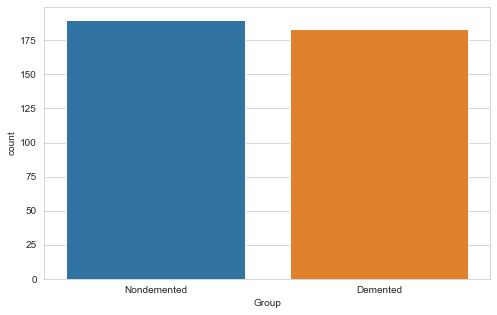

In [50]:
#We have three groups so convert Converted Group Into Demented

df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=df)
#72 of the subjects were grouped as 'Nondemented' throughout the study.
#64 of the subjects were grouped as 'Demented' at the time of their initial visits and remained so throughout the study.
#14 subjects were grouped as 'Nondemented' at the time of their initial visit and were subsequently characterized as 'Demented' at a later visit.
#These fall under the 'Converted' category.

<AxesSubplot:xlabel='Group', ylabel='count'>

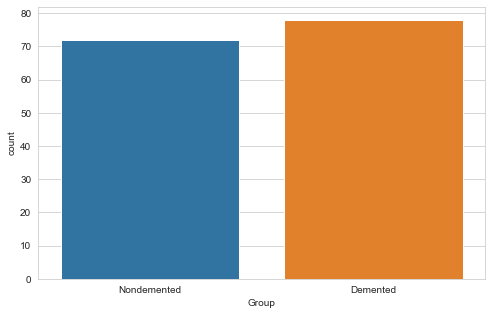

In [51]:
#see how many people have Alzheimer
#same person visits two or more time so only take the single visit data
sns.set_style("whitegrid")
df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=df)

              M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

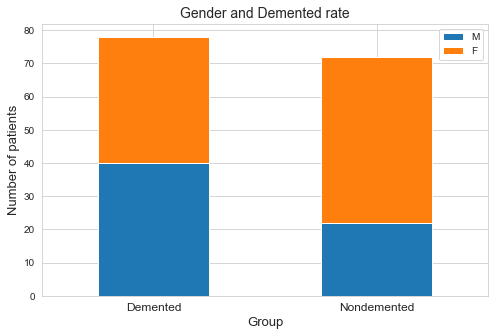

In [52]:
# bar drawing function
def bar_chart(feature):
    Demented = df[df['Group']=='Demented'][feature].value_counts()
    Nondemented = df[df['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)
                
                
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

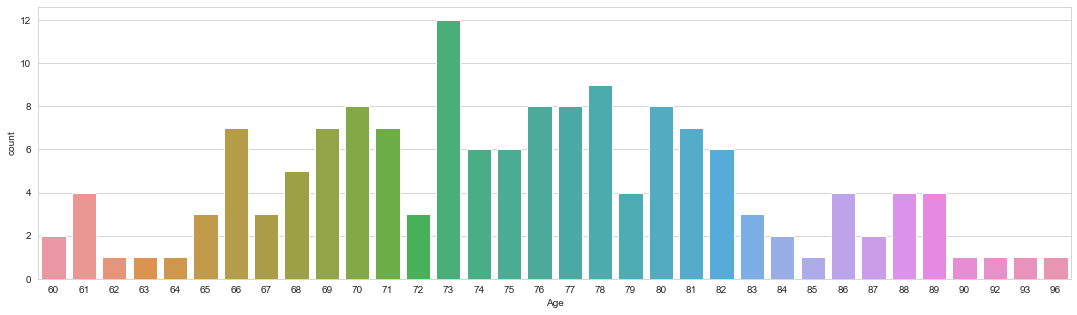

In [53]:
ax = sns.countplot(x='Age', data=df)
ax.figure.set_size_inches(18.5, 5)

(50.0, 100.0)

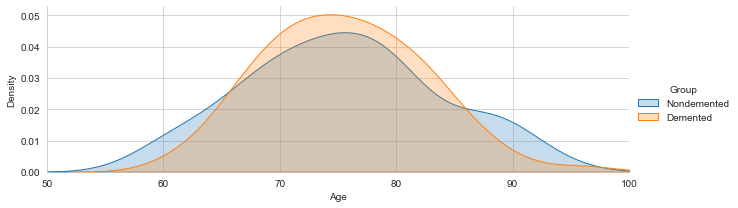

In [54]:
#AGE vs Non-demented and demented
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)
#There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients. We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.

In [55]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

C:\Users\Dell\AppData\Local\Temp\ipykernel_18456\4064293154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])


In [56]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [57]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [58]:
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [59]:
total_models = ['GridSearchCV','SVC','DecisionTreeClassifier','XGBClassifier','LGBMClassifier',
                    'ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier','KNeighborsClassifier',
                    'MLPClassifier','GaussianNB','LogisticRegression']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

In [62]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}


Confusion Matrix:
[[14  5]
 [ 9 17]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.74      0.67        19
           1       0.77      0.65      0.71        26

    accuracy                           0.69        45
   macro avg       0.69      0.70      0.69        45
weighted avg       0.70      0.69      0.69        45



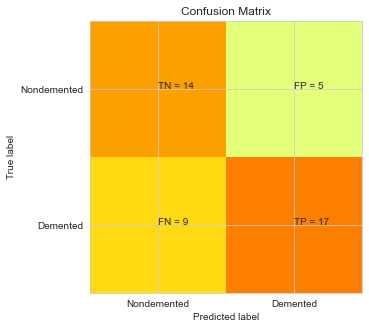

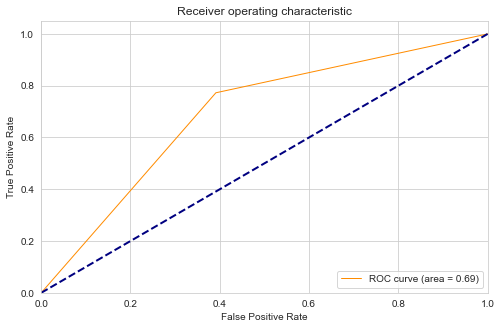


Acuuracy Of the Model:  0.6888888888888889 




In [67]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'roc_auc')
CV_rfc.fit(X_train, y_train.ravel())
print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
report_performance(CV_rfc) 
roc_curves(CV_rfc)
accuracy(CV_rfc)



Confusion Matrix:
[[15  4]
 [ 6 20]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.83      0.77      0.80        26

    accuracy                           0.78        45
   macro avg       0.77      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45



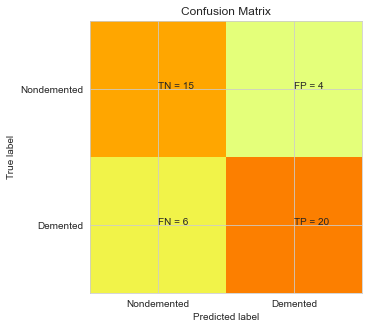

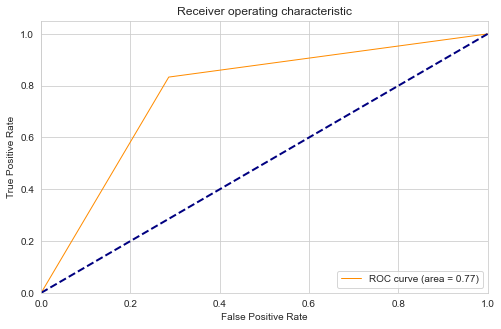


Acuuracy Of the Model:  0.7777777777777778 




In [68]:
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm) 
roc_curves(svm)
accuracy(svm)



Confusion Matrix:
[[14  5]
 [13 13]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.52      0.74      0.61        19
           1       0.72      0.50      0.59        26

    accuracy                           0.60        45
   macro avg       0.62      0.62      0.60        45
weighted avg       0.64      0.60      0.60        45



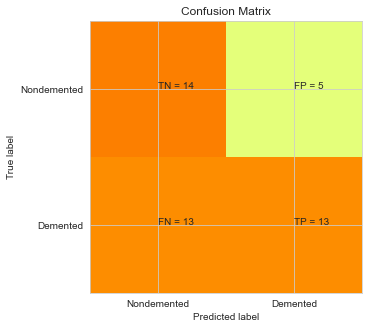

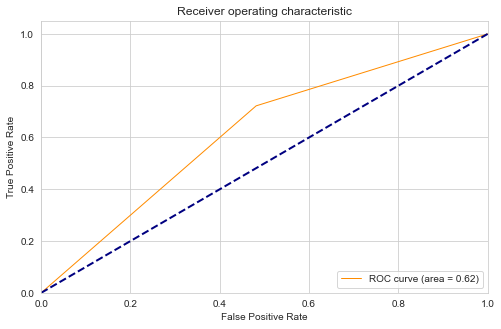


Acuuracy Of the Model:  0.6 




In [69]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)

In [71]:
clfs =[ExtraTreesClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),
          MLPClassifier(alpha=1),LogisticRegression()]

ExtraTreesClassifier : 


Confusion Matrix:
[[15  4]
 [14 12]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.52      0.79      0.62        19
           1       0.75      0.46      0.57        26

    accuracy                           0.60        45
   macro avg       0.63      0.63      0.60        45
weighted avg       0.65      0.60      0.59        45



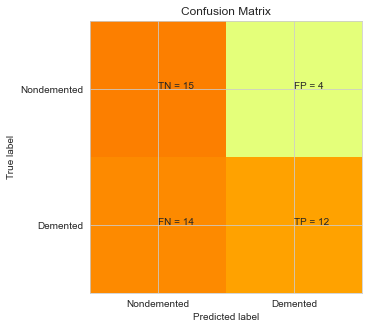

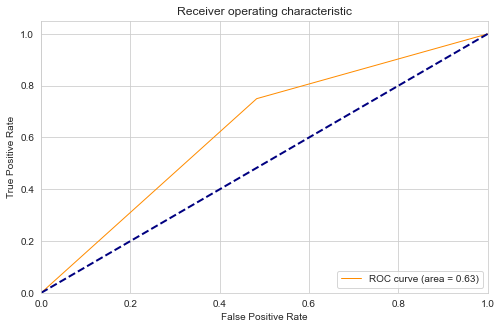


Acuuracy Of the Model:  0.6 


GradientBoostingClassifier : 


Confusion Matrix:
[[14  5]
 [ 8 18]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.74      0.68        19
           1       0.78      0.69      0.73        26

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.72      0.71      0.71        45



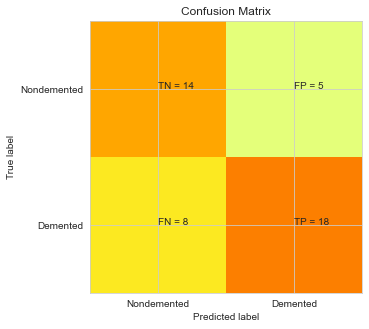

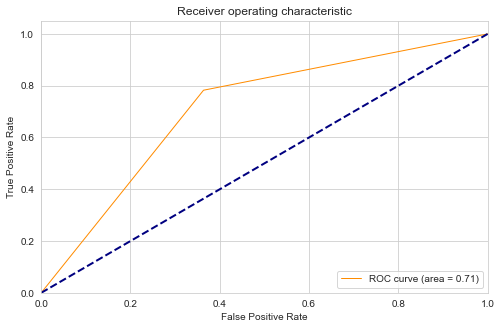


Acuuracy Of the Model:  0.7111111111111111 


AdaBoostClassifier : 


Confusion Matrix:
[[16  3]
 [ 5 21]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.88      0.81      0.84        26

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45



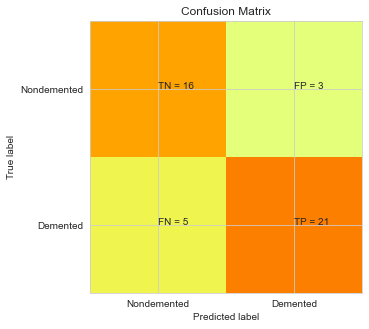

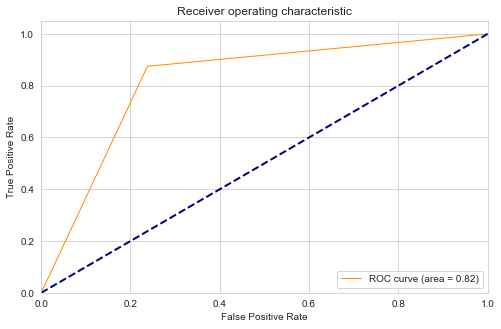


Acuuracy Of the Model:  0.8222222222222222 


KNeighborsClassifier : 


Confusion Matrix:
[[14  5]
 [12 14]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.54      0.74      0.62        19
           1       0.74      0.54      0.62        26

    accuracy                           0.62        45
   macro avg       0.64      0.64      0.62        45
weighted avg       0.65      0.62      0.62        45



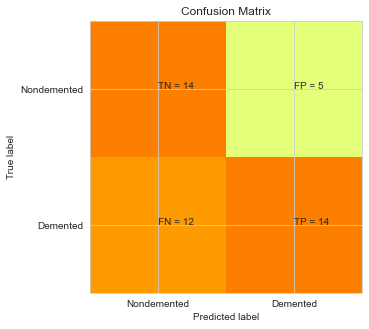

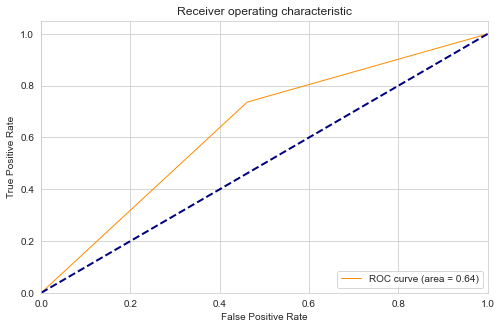


Acuuracy Of the Model:  0.6222222222222222 


MLPClassifier : 


Confusion Matrix:
[[13  6]
 [11 15]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.54      0.68      0.60        19
           1       0.71      0.58      0.64        26

    accuracy                           0.62        45
   macro avg       0.63      0.63      0.62        45
weighted avg       0.64      0.62      0.62        45



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


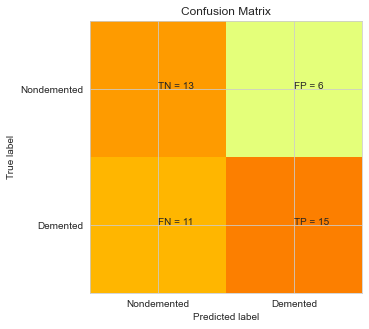

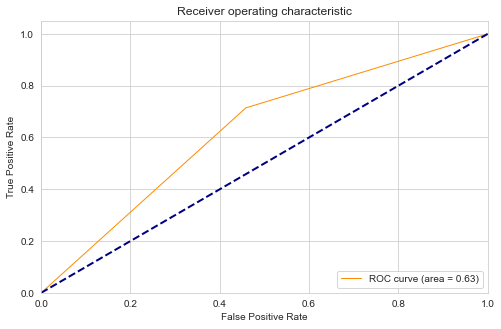


Acuuracy Of the Model:  0.6222222222222222 


GaussianNB : 


Confusion Matrix:
[[14  5]
 [ 4 22]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        19
           1       0.81      0.85      0.83        26

    accuracy                           0.80        45
   macro avg       0.80      0.79      0.79        45
weighted avg       0.80      0.80      0.80        45



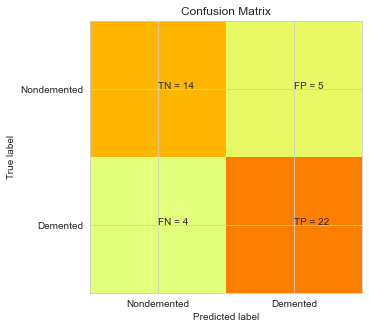

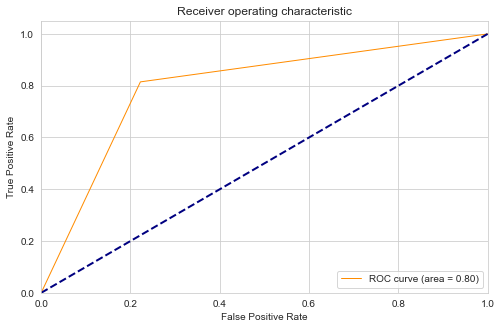


Acuuracy Of the Model:  0.8 


LogisticRegression : 


Confusion Matrix:
[[15  4]
 [ 7 19]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       0.83      0.73      0.78        26

    accuracy                           0.76        45
   macro avg       0.75      0.76      0.75        45
weighted avg       0.77      0.76      0.76        45



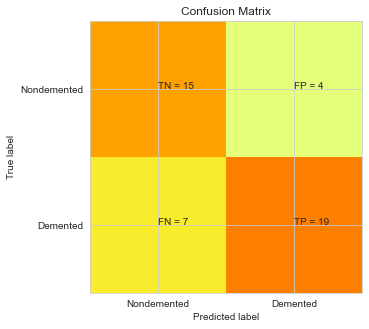

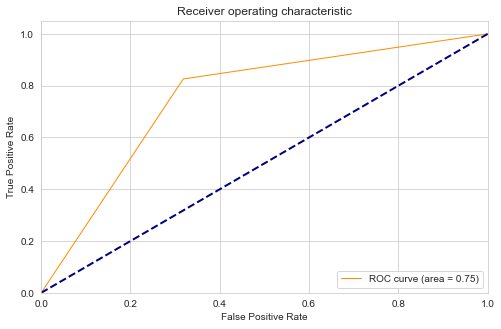


Acuuracy Of the Model:  0.7555555555555555 




In [72]:
for model in clfs:
    print(str(model).split('(')[0],": ")
    model.fit(X_train,y_train.ravel())
    X = pd.DataFrame(X_train)
    report_performance(model)
    roc_curves(model)
    accuracy(model)